The below is the code to solve a SDOF model and get the dynamic response of reinforced concrete structure with elastoplstic model.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

#To calculate the natual period of time
def get_natural_period(M,k):
  term_A = (2* np.pi * math.sqrt(M)) / math.sqrt(k)
  return term_A

#To calculate the load against the time of application of load
def get_load_value(x):
  if x >= range_a_start and x <= range_a_end:
    term_B = (500*x) + 50
    return term_B
  elif x > range_b_start and x <= range_b_end:
    term_B = (-1250 * x) + 225
    return term_B
  else:
    return 50


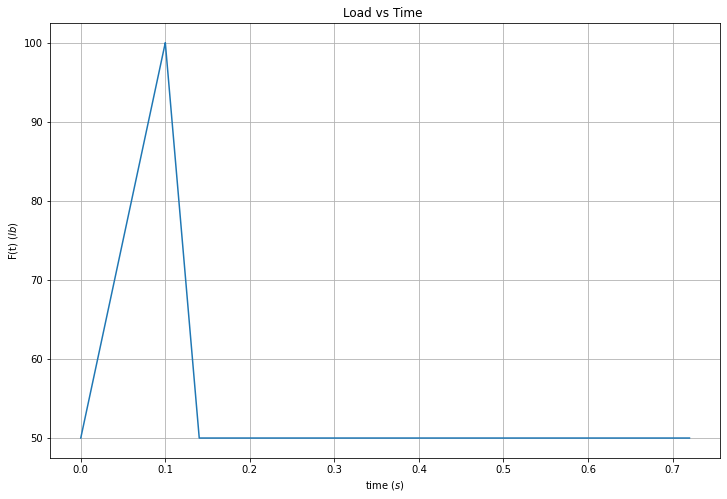

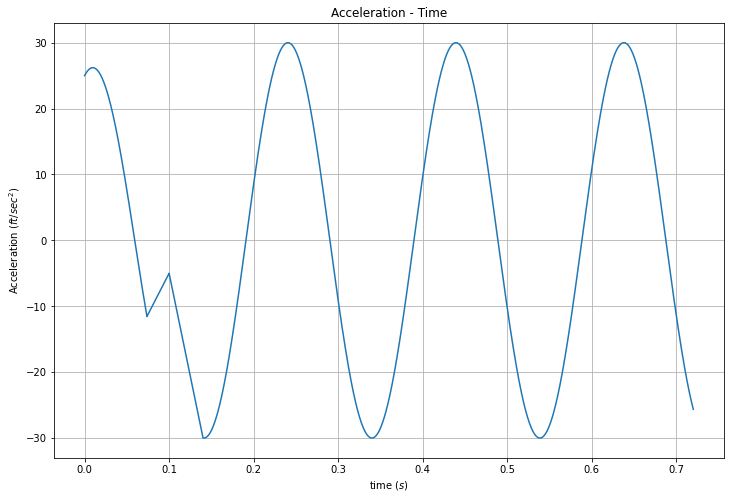

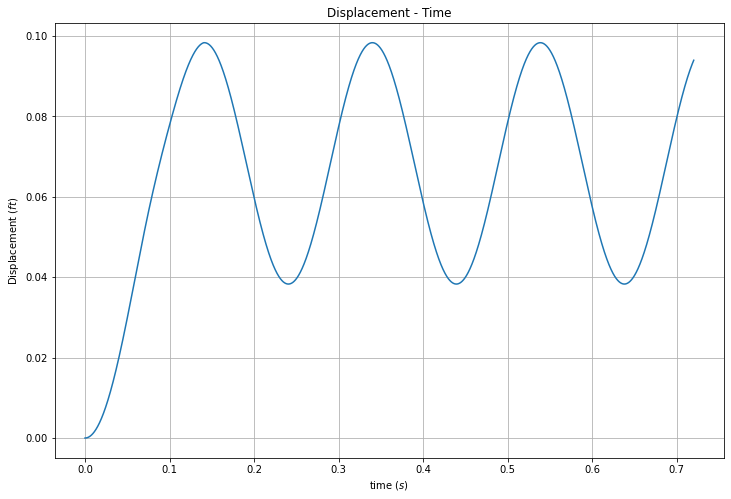

In [13]:
# material properties
k = 2000        #stiffness of the spring (lb/ft)
W = 64.4        #Weight of the beam (lb)
M = 2           #Mass of beam (lb-sec^2/ft)
Rm = 110        #Resistance (lb)
ym = 0.0983     #Maximum Displacement limit for beam according to peak load applied (ft)

#Calulation of Elastic Limit
yel = Rm/k

#Calculation of time step
T = 0.72   # total time (sec)
reduction_factor = 0.00001

natural_period = get_natural_period(M,k)                         #Calculate the natural period of time
delta_t = natural_period * reduction_factor                   #Apply reduction factor and calculate the time step delta t
n_t_steps = int((T / delta_t))                                 # number of time steps
t = np.linspace(0, T, n_t_steps)                               # initialise the time domain


#Load domain data
range_a_start = 0.0                                   #Linear Load line initial limit
range_a_end = 0.10                                    #Linear Load line final limit
range_b_start = 0.10                                  #Linear Load line initial limit
range_b_end = 0.14                                    #Linear Load line final limit

Load = []
Load = np.array(list(map(get_load_value,t)))

#Displacement calculation 

#Initialising displacement array
Disp = []
Disp = np.zeros(n_t_steps)
#Initialising acceleration array
Acc = []
Acc = np.zeros(n_t_steps)

#Initial conditions
Disp[0] = 0
Acc[0] = 0

Trip = 0

for count in range(0, n_t_steps, 1):
  if Trip == 0 and Disp[count] >= 0 and Disp[count] < yel:
    Acc[count] = ((Load[count])-(k*Disp[count]))/M
  elif Trip == 0 and Disp[count] > yel and Disp[count] <= (ym):
    Acc[count] = ((Load[count])-(Rm))/M

  if Disp[count] >= ym and Trip == 0:
    Trip = 1
    Disp[count] = ym

  if Trip == 1: #The limits are as this but not used in the code = Disp[count] >= (ym - (2*yel)) and Disp[count] <= (ym):
    Acc[count] = (Load[count]-Rm + (k*(ym-Disp[count])) )/M

  #Initial value of disp
  if count == 0:
      Disp[count+1] = (0.5*Acc[count])* delta_t * delta_t

  #Remaining value of disp
  if count > 0 and count <= (n_t_steps - 2):
    Disp[count+1] = (2* Disp[count]) - Disp[count - 1] + (Acc[count]* delta_t * delta_t)

#Load Time Graph
plt.figure(figsize = (12, 8))
plt.plot(t,Load)
plt.xlabel('time ($s$)')
plt.ylabel('F(t) ($lb$)')
plt.title('Load vs Time ')
plt.grid()
plt.show()

#Plot acceleration
plt.figure(figsize = (12, 8))
plt.plot(t,Acc)
plt.xlabel('time ($s$)')
plt.ylabel('Acceleration ($ft/sec^2$)')
plt.title('Acceleration - Time')
plt.grid()
plt.show()

#Plot Displacement
plt.figure(figsize = (12, 8))
plt.plot(t,Disp)
plt.xlabel('time ($s$)')
plt.ylabel('Displacement ($ft$)')
plt.title('Displacement - Time')
plt.grid()
plt.show()
